In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install chart_studio


     |████████████████████████████████| 64 kB 1.9 MB/s 


In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
# STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
d=pd.read_csv("/content/drive/MyDrive/consumer_complaints_small.csv",low_memory=False)

In [ ]:
d.shape

(824997, 3)

In [ ]:
d

,Unnamed: 0,Product,Consumer complaint narrative
0,1,Vehicle loan or lease,I contacted Ally on Friday XX/XX/XXXX after fa...
1,3,"Credit reporting, credit repair services, or o...",I was told my bankruptcy would be off my credi...
2,8,"Credit reporting, credit repair services, or o...",Hello This complaint is against the three cred...
3,9,"Credit reporting, credit repair services, or o...",I am a victim of Identity Theft & currently ha...
4,10,"Credit reporting, credit repair services, or o...","Dear CFPB, The purpose of this letter is to in..."
...,...,...,...
824992,2361623,Credit card,"Automated calls from "" XXXX with Capital One '..."
824993,2361624,Debt collection,I have disputed my debts several times with no...
824994,2361625,Mortgage,My father died in XX/XX/XXXX. Left me his only...
824995,2361626,Credit reporting,cfbp i would Like to file a complaint on Exper...


In [ ]:
d = d.drop(["Unnamed: 0"],axis=1)

In [ ]:
df = d[:300000]

In [ ]:
df.shape

(300000, 2)

In [ ]:
df

,Product,Consumer complaint narrative
0,Vehicle loan or lease,I contacted Ally on Friday XX/XX/XXXX after fa...
1,"Credit reporting, credit repair services, or o...",I was told my bankruptcy would be off my credi...
2,"Credit reporting, credit repair services, or o...",Hello This complaint is against the three cred...
3,"Credit reporting, credit repair services, or o...",I am a victim of Identity Theft & currently ha...
4,"Credit reporting, credit repair services, or o...","Dear CFPB, The purpose of this letter is to in..."
...,...,...
299995,"Credit reporting, credit repair services, or o...",I am contacting you about the compromising of ...
299996,Mortgage,In XX/XX/2020 I reached out to Wells Fargo reg...
299997,"Credit reporting, credit repair services, or o...",MY INFORMATION WAS USED FRAUDULENTLY TO OPEN A...
299998,Student loan,I was a customer of XXXX XXXX in the year ...


In [ ]:
df.Product.value_counts()


Credit reporting, credit repair services, or other personal consumer reports    153441
Debt collection                                                                  50470
Credit card or prepaid card                                                      28522
Mortgage                                                                         23258
Checking or savings account                                                      17299
Money transfer, virtual currency, or money service                                8277
Vehicle loan or lease                                                             6650
Student loan                                                                      5996
Payday loan, title loan, or personal loan                                         4350
Credit card                                                                        483
Credit reporting                                                                   461
Bank account or service                    

In [ ]:
df.loc[df['Product'] == 'Credit reporting', 'Product'] = 'Credit reporting, credit repair services, or other personal consumer reports'
df.loc[df['Product'] == 'Credit card', 'Product'] = 'Credit card or prepaid card'
df.loc[df['Product'] == 'Payday loan', 'Product'] = 'Payday loan, title loan, or personal loan'
df.loc[df['Product'] == 'Virtual currency', 'Product'] = 'Money transfer, virtual currency, or money service'
df = df[df.Product != 'Other financial service']

In [ ]:
def print_plot(index):
    example = df[df.index == index][['Consumer complaint narrative', 'Product']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Product:', example[1])
print_plot(10)

Speedy Cash listed the negative item on my credit report under another name ( XXXX XXXX ) ... I have contact them and advised that the previous fees paid on the account should be credited and not have the pay the full amount pay. Need the negative item removed immediately. They have also done illegal active on the account to stay on the credit report ... .stating that I paid {$1.00} on the account so it can be active. Also making changes on the account, by changing the amount due on the account several months in a row.
Product: Credit reporting, credit repair services, or other personal consumer reports


In [ ]:
print_plot(100)


XXXX XXXX is refusing to delete this debt. I have paid this medical bill 5 months ago. All my information on my credit report needs to be updated ASAP! And all old accounts that's over 2 years old.
Product: Debt collection


In [ ]:

df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(clean_text)
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].str.replace('\d+', '')

In [ ]:
print_plot(10)

speedy cash listed negative item credit report another name contact advised previous fees paid account credited pay full amount pay need negative item removed immediately also done illegal active account stay credit report stating paid  account active also making changes account changing amount due account several months row
Product: Credit reporting, credit repair services, or other personal consumer reports


In [ ]:
print_plot(100)


refusing delete debt paid medical bill  months ago information credit report needs updated asap old accounts thats  years old
Product: Debt collection


In [ ]:

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 500
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Consumer complaint narrative'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 104046 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(df['Consumer complaint narrative'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)


Shape of data tensor: (299983, 500)


In [ ]:
Y = pd.get_dummies(df['Product']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (299983, 13)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(269984, 500) (269984, 13)
(29999, 500) (29999, 13)


## LSTM MODEL


In [ ]:
%%time
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(13, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 2
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/2
1013/1013 [==============================] - 1372s 1s/step - loss: 1.0101 - accuracy: 0.6680 - val_loss: 0.7076 - val_accuracy: 0.7761
Epoch 2/2
1013/1013 [==============================] - 1376s 1s/step - loss: 0.6904 - accuracy: 0.7786 - val_loss: 0.6187 - val_accuracy: 0.8078
CPU times: user 1h 23min 43s, sys: 4min 29s, total: 1h 28min 13s
Wall time: 46min 25s


In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

250/250 [==============================] - 30s 120ms/step - loss: 0.6275 - accuracy: 0.7958
Test set
  Loss: 0.627
  Accuracy: 0.796


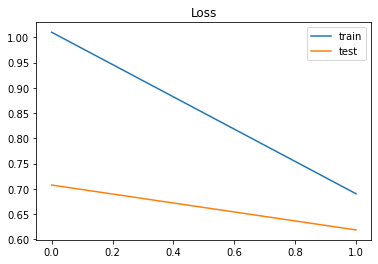

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

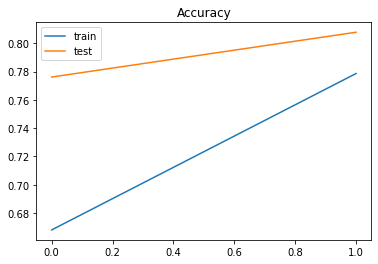

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
new_complaint = ['I am a victim of identity theft and someone stole my identity and personal information to open up a Visa credit card account with Bank of America. The following Bank of America Visa credit card account do not belong to me : XXXX.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Mortgage', 'Credit card or prepaid card', 'Student loan', 'Bank account or service', 'Checking or savings account', 'Consumer Loan', 'Payday loan, title loan, or personal loan', 'Vehicle loan or lease', 'Money transfer, virtual currency, or money service', 'Money transfers', 'Prepaid card']
print(pred, labels[np.argmax(pred)])

[[2.2577071e-05 5.2327425e-03 2.1947153e-05 1.3531166e-01 7.8029674e-01
  6.6822052e-02 6.8106083e-04 1.2333518e-05 2.1327140e-03 2.4126610e-03
  9.0920239e-06 6.0345029e-04 6.4409641e-03]] Student loan


In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

## LSTM + CNN

In [ ]:
top_words = 50000
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=X.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(13, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           1600000   
                                                                 
 conv1d (Conv1D)             (None, 500, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 250, 32)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_1 (Dense)             (None, 13)                1313      
                                                                 
Total params: 1,657,617
Trainable params: 1,657,617
Non-trainable params: 0
____________________________________________

In [ ]:
accr2 = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr2[0],accr2[1]))

938/938 [==============================] - 47s 50ms/step - loss: 0.0601 - accuracy: 0.8527
Test set
  Loss: 0.060
  Accuracy: 0.853


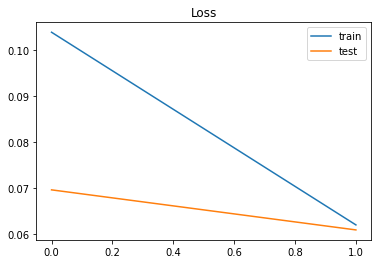

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

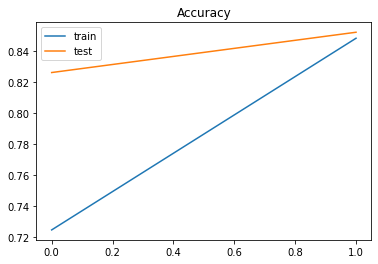

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
new_complaint = ['I am a victim of identity theft and someone stole my identity and personal information to open up a Visa credit card account with Bank of America. The following Bank of America Visa credit card account do not belong to me : XXXX.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Mortgage', 'Credit card or prepaid card', 'Student loan', 'Bank account or service', 'Checking or savings account', 'Consumer Loan', 'Payday loan, title loan, or personal loan', 'Vehicle loan or lease', 'Money transfer, virtual currency, or money service', 'Money transfers', 'Prepaid card']
print(pred, labels[np.argmax(pred)])

[[8.2929233e-05 7.9631805e-04 7.4028831e-05 4.6487451e-02 9.2696452e-01
  1.0872841e-02 1.6662478e-04 2.1905827e-05 7.0431284e-05 7.5209141e-04
  1.6685366e-05 2.0280480e-04 7.1445107e-04]] Student loan


## Neural Network

In [ ]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=500, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(13, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])# Final evaluation of the model

# Make predictions with tuned model

Epoch 1/2
3797/3797 [==============================] - 9s 2ms/step - loss: 2.0630 - accuracy: 0.4916 - val_loss: 0.1928 - val_accuracy: 0.5128
Epoch 2/2
3797/3797 [==============================] - 8s 2ms/step - loss: 0.1865 - accuracy: 0.5128 - val_loss: 0.1869 - val_accuracy: 0.5129


In [ ]:
accr3 = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr3[0],accr3[1]))

938/938 [==============================] - 1s 1ms/step - loss: 0.1912 - accuracy: 0.5146
Test set
  Loss: 0.191
  Accuracy: 0.515


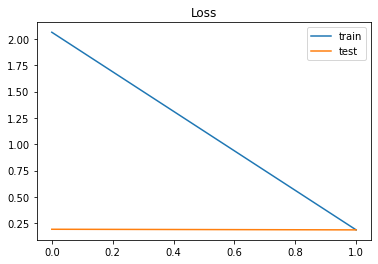

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

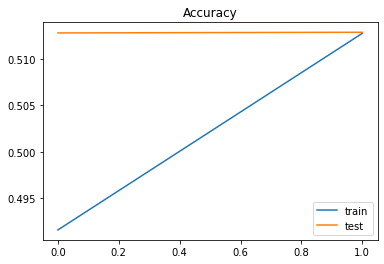

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
new_complaint = ['I am a victim of identity theft and someone stole my identity and personal information to open up a Visa credit card account with Bank of America. The following Bank of America Visa credit card account do not belong to me : XXXX.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Mortgage', 'Credit card or prepaid card', 'Student loan', 'Bank account or service', 'Checking or savings account', 'Consumer Loan', 'Payday loan, title loan, or personal loan', 'Vehicle loan or lease', 'Money transfer, virtual currency, or money service', 'Money transfers', 'Prepaid card']
print(pred, labels[np.argmax(pred)])

[[1.1835992e-03 5.7758451e-02 2.7599931e-03 9.8157942e-02 5.1241404e-01
  1.6171533e-01 2.6747465e-02 1.1108518e-03 7.7822030e-02 1.4650524e-02
  4.7352910e-04 1.9312829e-02 2.1903038e-02]] Student loan


## Bi-LSTM MODEL

In [ ]:
import keras
from keras import layers
max_features = 50000  # Only consider the top 20k words
maxlen = 200  
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)

# Add a classifier
outputs = layers.Dense(13, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_3 (Embedding)     (None, None, 128)         6400000   
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 128)        98816     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 13)                1677      
                                                                 
Total params: 6,599,309
Trainable params: 6,599,309
Non-tra

In [ ]:
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])# Final evaluation of the model


Epoch 1/2
3797/3797 [==============================] - 6676s 2s/step - loss: 0.1010 - accuracy: 0.7261 - val_loss: 0.0686 - val_accuracy: 0.8288
Epoch 2/2
3797/3797 [==============================] - 6618s 2s/step - loss: 0.0596 - accuracy: 0.8549 - val_loss: 0.0606 - val_accuracy: 0.8537


In [ ]:
accr4 = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr4[0],accr4[1]))

938/938 [==============================] - 220s 234ms/step - loss: 0.0592 - accuracy: 0.8556
Test set
  Loss: 0.059
  Accuracy: 0.856


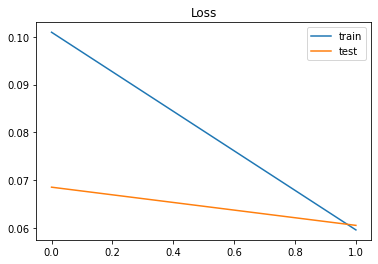

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

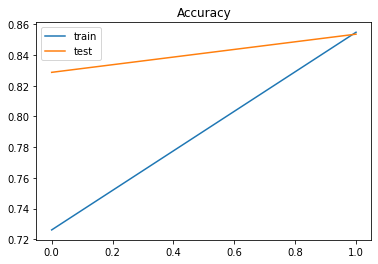

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
new_complaint = ['I am a victim of identity theft and someone stole my identity and personal information to open up a Visa credit card account with Bank of America. The following Bank of America Visa credit card account do not belong to me : XXXX.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Mortgage', 'Credit card or prepaid card', 'Student loan', 'Bank account or service', 'Checking or savings account', 'Consumer Loan', 'Payday loan, title loan, or personal loan', 'Vehicle loan or lease', 'Money transfer, virtual currency, or money service', 'Money transfers', 'Prepaid card']
print(pred, labels[np.argmax(pred)])

[[2.0803531e-05 4.1419268e-04 2.4834253e-05 2.7394593e-02 9.7960806e-01
  4.2840838e-03 1.9943714e-04 3.0684507e-06 9.9887566e-06 1.2219814e-04
  5.3425642e-06 1.1530539e-04 3.0526519e-04]] Student loan


## RNN


In [ ]:
import keras
from keras import layers

In [ ]:
MAX_NUM_WORDS = 50000
model = Sequential()
model.add(Embedding(MAX_NUM_WORDS, 128))
model.add(LSTM(units = 128, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(units = 13, activation = 'sigmoid'))
print(model.summary())
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, Y_train, epochs=2, batch_size=64,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])# Final evaluation of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         6400000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 13)                1677      
                                                                 
Total params: 6,533,261
Trainable params: 6,533,261
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
127/127 [==============================] - 405s 3s/step - loss: 0.2359 - accuracy: 0.4414 - val_loss: 0.1879 - val_accuracy: 0.4856
Epoch 2/2
127/127 [==============================] - 393s 3s/step - loss: 0.1877 - accuracy: 0.4590 - val_loss: 0.1800 - val_accuracy: 0.4822


## Machine Learning

In [ ]:
import pandas as pd

df_tmp = pd.read_csv("/content/drive/MyDrive/consumer_complaints_small.csv",low_memory=False)

In [ ]:
df_tmp

,Unnamed: 0,Product,Consumer complaint narrative
0,1,Vehicle loan or lease,I contacted Ally on Friday XX/XX/XXXX after fa...
1,3,"Credit reporting, credit repair services, or o...",I was told my bankruptcy would be off my credi...
2,8,"Credit reporting, credit repair services, or o...",Hello This complaint is against the three cred...
3,9,"Credit reporting, credit repair services, or o...",I am a victim of Identity Theft & currently ha...
4,10,"Credit reporting, credit repair services, or o...","Dear CFPB, The purpose of this letter is to in..."
...,...,...,...
824992,2361623,Credit card,"Automated calls from "" XXXX with Capital One '..."
824993,2361624,Debt collection,I have disputed my debts several times with no...
824994,2361625,Mortgage,My father died in XX/XX/XXXX. Left me his only...
824995,2361626,Credit reporting,cfbp i would Like to file a complaint on Exper...


In [ ]:
df_tmp = df_tmp.drop(['Unnamed: 0'],axis=1)

In [ ]:
df=df_tmp[:10000]

In [ ]:
df.shape

(10000, 2)

In [ ]:
from io import StringIO
col = ['Product', 'Consumer complaint narrative']
df = df[col]
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.columns = ['Product', 'Consumer_complaint_narrative']
df['category_id'] = df['Product'].factorize()[0]
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
df.head()

,Product,Consumer_complaint_narrative,category_id
0,Vehicle loan or lease,I contacted Ally on Friday XX/XX/XXXX after fa...,0
1,"Credit reporting, credit repair services, or o...",I was told my bankruptcy would be off my credi...,1
2,"Credit reporting, credit repair services, or o...",Hello This complaint is against the three cred...,1
3,"Credit reporting, credit repair services, or o...",I am a victim of Identity Theft & currently ha...,1
4,"Credit reporting, credit repair services, or o...","Dear CFPB, The purpose of this letter is to in...",1


In [ ]:
df['Consumer_complaint_narrative'].value_counts()

I would like to request the suppression of the following items from my credit report, which are the result of my falling victim to identity theft. This information does not relate to [ transactions that I have made/accounts that I have opened ], as the attached supporting documentation can attest. As such, it should be blocked from appearing on my credit report pursuant to section 605B of the Fair Credit Reporting Act.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

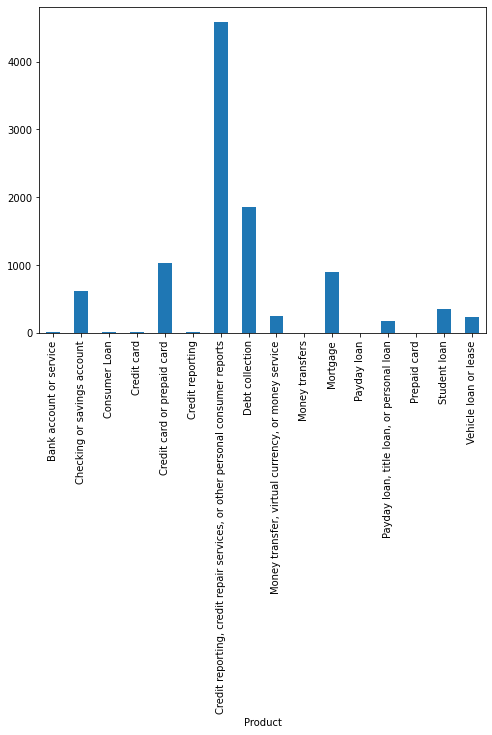

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
labels = df.category_id
features.shape

(10000, 31652)

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Bank account or service':
  . Most correlated unigrams:
. stranger
. netspend
  . Most correlated bigrams:
. ask look
. husband account


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Checking or savings account':
  . Most correlated unigrams:
. deposit
. branch
  . Most correlated bigrams:
. savings account
. checking account


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Consumer Loan':
  . Most correlated unigrams:
. conveniently
. prestige
  . Most correlated bigrams:
. companies using
. prestige financial


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Credit card':
  . Most correlated unigrams:
. 67
. republic
  . Most correlated bigrams:
. called did
. 67 00


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Credit card or prepaid card':
  . Most correlated unigrams:
. citi
. card
  . Most correlated bigrams:
. american express
. credit card


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Credit reporting':
  . Most correlated unigrams:
. occassions
. judgements
  . Most correlated bigrams:
. following account
. getting job


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Most correlated unigrams:
. equifax
. report
  . Most correlated bigrams:
. identity theft
. credit report


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Debt collection':
  . Most correlated unigrams:
. collection
. debt
  . Most correlated bigrams:
. collect debt
. debt collector


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Money transfer, virtual currency, or money service':
  . Most correlated unigrams:
. coinbase
. paypal
  . Most correlated bigrams:
. coinbase account
. cash app


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Money transfers':
  . Most correlated unigrams:
. elevated
. beneficiary
  . Most correlated bigrams:
. situation just
. money day


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Mortgage':
  . Most correlated unigrams:
. escrow
. mortgage
  . Most correlated bigrams:
. loan modification
. mortgage company


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Payday loan':
  . Most correlated unigrams:
. customary
. prohibited
  . Most correlated bigrams:
. longer pay
. pay day


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Payday loan, title loan, or personal loan':
  . Most correlated unigrams:
. loan
. payday
  . Most correlated bigrams:
. 00 loan
. payday loan


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Prepaid card':
  . Most correlated unigrams:
. replacement
. abrupt
  . Most correlated bigrams:
. called money
. card access


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Student loan':
  . Most correlated unigrams:
. loans
. navient
  . Most correlated bigrams:
. student loan
. loan forgiveness
# 'Vehicle loan or lease':
  . Most correlated unigrams:
. car
. vehicle
  . Most correlated bigrams:
. chase auto
. gm financial


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [ ]:
df[df['Consumer_complaint_narrative'] == "last year shortly opening line credit made payment hounded several times day company another payment due told violation never call payment issues today called  times already sent statement showing bill due verify  pieces information discussing personal information zero regard federal regulations"]

,Product,Consumer_complaint_narrative,category_id


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as s

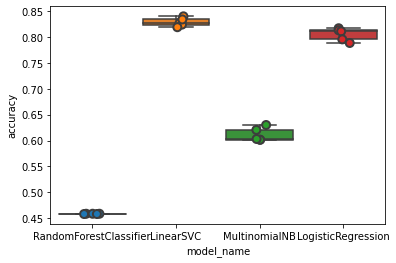

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),

]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()



model_name
LinearSVC                 0.8288
LogisticRegression        0.8050
MultinomialNB             0.6113
RandomForestClassifier    0.4583
Name: accuracy, dtype: float64

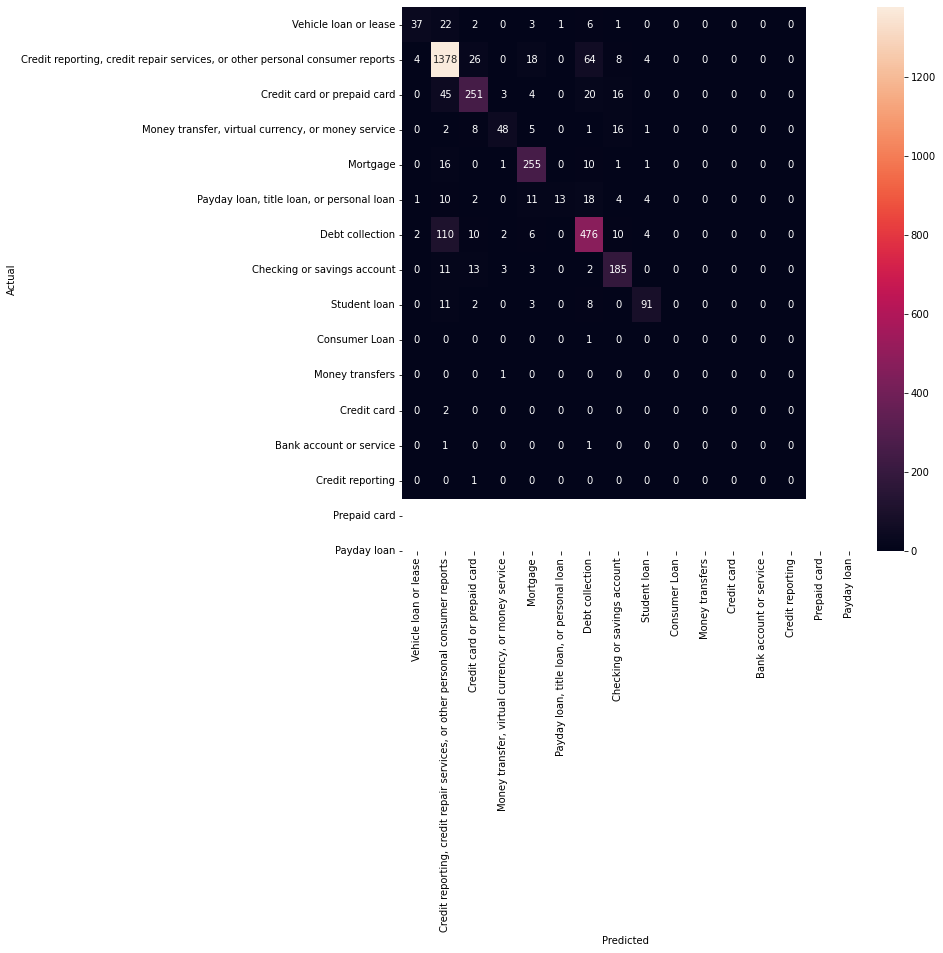

In [ ]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.51      0.64        72
           1       0.86      0.92      0.89      1502
           2       0.80      0.74      0.77       339
           3       0.83      0.59      0.69        81
           4       0.83      0.90      0.86       284
           5       0.93      0.21      0.34        63
           6       0.78      0.77      0.78       620
           7       0.77      0.85      0.81       217
           8       0.87      0.79      0.83       115
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1

    accuracy                           0.83      3300
   macro avg       0.54      0.45      0.47      3300
weighted avg       0.83      0.83      0.82      3300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
new_complaint = ['I am a victim of identity theft and someone stole my identity and personal information to open up a Visa credit card account with Bank of America. The following Bank of America Visa credit card account do not belong to me : XXXX.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Mortgage', 'Credit card or prepaid card', 'Student loan', 'Bank account or service', 'Checking or savings account', 'Consumer Loan', 'Payday loan, title loan, or personal loan', 'Vehicle loan or lease', 'Money transfer, virtual currency, or money service', 'Money transfers', 'Prepaid card']
print(pred, labels[np.argmax(pred)])

NameError: ignored